In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_df=pd.read_csv(os.path.join('.','wine-data.csv'))
data_df.head(3)

,kind,alcohol,malic acid,ash,alkalinity,magnesium,phenols,flavonoids,nf phenols,pas,color,fue,od2380/315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


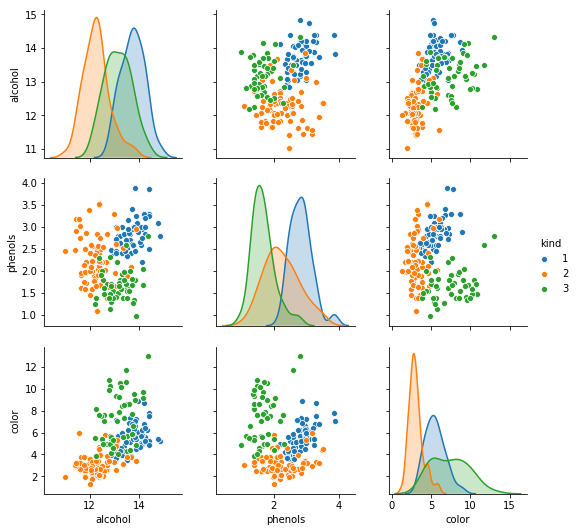

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot
sns.pairplot(
    data_df,
    # Variables on the x-axes
    x_vars=['alcohol', 'phenols', 'color'],
    # Variables on the y-axes
    y_vars=['alcohol', 'phenols', 'color'],
    # Use a different color for each kind of wine
    hue='kind'
)
plt.show()

In [7]:
# Create X/y arrays

features=data_df.drop('kind', axis=1)
X=features.values
y=data_df['kind'].values

print('X:', X.shape)
print('y:', y.shape)

X: (178, 13)
y: (178,)


In [ ]:
# Compute PCSA estimator
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
pca.fit(X, y=None); # Unsupervised learning, no y variable